Minimum loss: 304.9390563964844
Final loss: 304.9390563964844


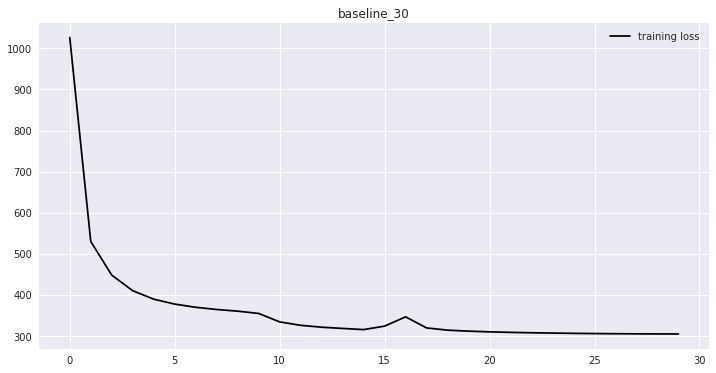

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import os

# ENCODER_DIR = 'trained_models/encoders/encoder_tissue_224_1024_256_30_1e-05_baseline'
ENCODER_DIR = 'trained_models/encoders/baseline_30'

with open(os.path.join(ENCODER_DIR, 'history.pickle'), 'rb') as file:
    history = pickle.load(file)

print('Minimum loss:', min(history['loss']))
print('Final loss:', history['loss'][-1])

plt.figure(figsize=(12, 6))
plt.title(os.path.split(ENCODER_DIR)[-1])

plt.plot(history['loss'], label='training loss', c='k')
plt.legend()

# plt.gca().set_yscale('log')
plt.show()

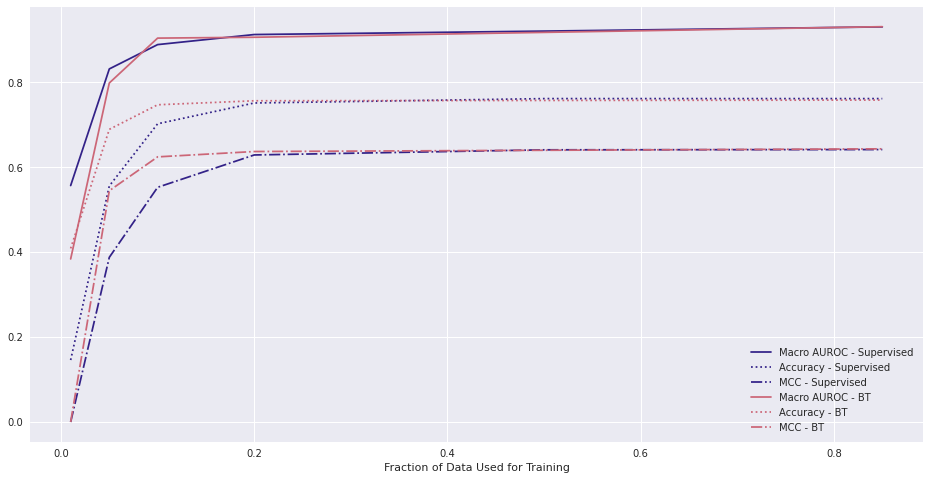

In [78]:
frac_data = [0.01, 0.05, 0.1, 0.2, 0.5, 0.85]
colors = ['#332288', '#CC6677']


plt.figure(figsize=(16, 8))
plt.style.use('seaborn')

# macro_AUROC = [0.4771, 0.8303, 0.8976, 0.9003, 0.8995]
macro_AUROC = [0.5570, 0.8316, 0.8889, 0.9126, 0.9207, 0.9306]
plt.plot(frac_data, macro_AUROC, label='Macro AUROC - Supervised', linestyle='solid', c=colors[0])

acc = [0.1460, 0.5560, 0.7024, 0.7514, 0.7617, 0.7617]
plt.plot(frac_data, acc, label='Accuracy - Supervised', linestyle='dotted', c=colors[0])

# MCC = [0.0081, 0.5266, 0.6262, 0.5993, 0.6211]
MCC = [0.0000, 0.3879, 0.5528, 0.6290, 0.6411, 0.6417]
plt.plot(frac_data, MCC, label='MCC - Supervised', linestyle='dashdot', c=colors[0])

# ============================================================================================== #

# from BT model trained for 15 epochs
# frac_data = [0.01, 0.05, 0.1, 0.2, 0.5, 0.85]
# acc = [0.4087, 0.6317, 0.7193, 0.7477, 0.7470, 0.7692]
# MCC = [0.0000, 0.4844, 0.5777, 0.6234, 0.6264, 0.6586]
# macro_AUROC = []

frac_data = [0.01, 0.05, 0.1, 0.2, 0.85]
acc = [0.4089, 0.6893, 0.7472, 0.7566, 0.7583]
MCC = [0.0000, 0.5448, 0.6245, 0.6371, 0.6434]
macro_AUROC = [0.3841, 0.7985, 0.9042, 0.9062, 0.9311]

plt.plot(frac_data, macro_AUROC, label='Macro AUROC - BT', linestyle='solid', c=colors[1])
plt.plot(frac_data, acc, label='Accuracy - BT', linestyle='dotted', c=colors[1])
plt.plot(frac_data, MCC, label='MCC - BT', linestyle='dashdot', c=colors[1])


plt.xlabel('Fraction of Data Used for Training')
plt.legend()
plt.show()

In [76]:
for i in [0.01, 0.2, 0.85]:
    !python evaluate_classifier.py -d "trained_models/classifiers/barlow_30_models/barlow_{i}" -p 2048

Figure(1000x600)
At early stop epoch,
	loss: 3.52786
	acc: 0.58203
	top_2_accuracy: 0.76953
	MCC: 0.37346
	val_loss: 48.81552
	val_acc: 0.45047
	val_top_2_accuracy: 0.49719
	val_MCC: 0.0

Calculating statistics...
Found 6935 validated image filenames belonging to 5 classes.
minor: ['junk' 'tils' 'white'] Found 1652 validated image filenames belonging to 5 classes.
major: ['stroma' 'tumor'] Found 5283 validated image filenames belonging to 5 classes.

all:
55/55 [==============================] - 19s 347ms/step - loss: 41.0117 - acc: 0.4089 - top_2_accuracy: 0.4787 - MCC: 0.0000e+00
minor:
13/13 [==============================] - 5s 374ms/step - loss: 55.4178 - acc: 0.0000e+00 - top_2_accuracy: 0.2930 - MCC: 0.0000e+00
major:
42/42 [==============================] - 15s 351ms/step - loss: 36.5069 - acc: 0.5368 - top_2_accuracy: 0.5368 - MCC: 0.0000e+00

generating confusion matrix...
100%|███████████████████████████████████████████████████████████████████████████████████| 55/55 [00:28<0

In [75]:
!ls trained_models/classifiers/barlow_30_models

barlow_0.01  barlow_0.05  barlow_0.1  barlow_0.2  barlow_0.85


In [63]:
!python evaluate_classifier.py -d "trained_models/classifiers/barlow_30_models/barlow_0.05" -p 2048

Figure(1000x600)
At early stop epoch,
	loss: 2.87533
	acc: 0.78223
	top_2_accuracy: 0.93604
	MCC: 0.66661
	val_loss: 2.90695
	val_acc: 0.76781
	val_top_2_accuracy: 0.92563
	val_MCC: 0.65262

Calculating statistics...
Found 6935 validated image filenames belonging to 5 classes.
minor: ['junk' 'tils' 'white'] Found 1652 validated image filenames belonging to 5 classes.
major: ['stroma' 'tumor'] Found 5283 validated image filenames belonging to 5 classes.

all:
55/55 [==============================] - 19s 346ms/step - loss: 3.1786 - acc: 0.6893 - top_2_accuracy: 0.8735 - MCC: 0.5448
minor:
13/13 [==============================] - 5s 384ms/step - loss: 4.4249 - acc: 0.2185 - top_2_accuracy: 0.4964 - MCC: 0.2115
major:
42/42 [==============================] - 15s 355ms/step - loss: 2.7889 - acc: 0.8365 - top_2_accuracy: 0.9915 - MCC: 0.6901

generating confusion matrix...
100%|███████████████████████████████████████████████████████████████████████████████████| 55/55 [00:28<00:00,  1.94it/s]

In [69]:
!python train_classifier.py

Model name: barlow_0.01
Saving at: trained_models/classifiers/barlow_30_models/barlow_0.01
Found 432 validated image filenames belonging to 5 classes.
Found 6491 validated image filenames belonging to 5 classes.
Found 6935 validated image filenames belonging to 5 classes.
Number of devices: 3

Steps per epoch: 1
Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 3.8699 - acc: 0.2656 - top_2_accuracy: 0.4688 - MCC: 0.0501
Epoch 00001: val_acc improved from -inf to 0.44516, saving model to trained_models/classifiers/barlow_30_models/barlow_0.01/classifier.h5
1/1 [==============================] - 28s 28s/step - loss: 3.8699 - acc: 0.2656 - top_2_accuracy: 0.4688 - MCC: 0.0501 - val_loss: 203.8987 - val_acc: 0.4452 - val_top_2_accuracy: 0.8569 - val_MCC: 0.0000e+00
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: 3.8877 - acc: 0.2383 - top_2_accuracy: 0.4219 - MCC: 0.0346
Epoch 00002: val_acc improved from 0.44516 to 0.44703, saving model to trained_models/

1/1 [==============================] - ETA: 0s - loss: 3.2927 - acc: 0.6641 - top_2_accuracy: 0.8477 - MCC: 0.4915
Epoch 00021: val_acc did not improve from 0.45047
1/1 [==============================] - 22s 22s/step - loss: 3.2927 - acc: 0.6641 - top_2_accuracy: 0.8477 - MCC: 0.4915 - val_loss: 31.9548 - val_acc: 0.4487 - val_top_2_accuracy: 0.4980 - val_MCC: 0.0000e+00
Epoch 22/30
1/1 [==============================] - ETA: 0s - loss: 3.2362 - acc: 0.6875 - top_2_accuracy: 0.8633 - MCC: 0.5243
Epoch 00022: val_acc did not improve from 0.45047
1/1 [==============================] - 22s 22s/step - loss: 3.2362 - acc: 0.6875 - top_2_accuracy: 0.8633 - MCC: 0.5243 - val_loss: 30.8485 - val_acc: 0.4430 - val_top_2_accuracy: 0.4923 - val_MCC: 0.0000e+00
Epoch 23/30
1/1 [==============================] - ETA: 0s - loss: 3.2838 - acc: 0.6445 - top_2_accuracy: 0.8555 - MCC: 0.4527
Epoch 00023: val_acc did not improve from 0.45047
1/1 [==============================] - 22s 22s/step - loss: 3.2

33/33 [==============================] - ETA: 0s - loss: 2.7706 - acc: 0.8198 - top_2_accuracy: 0.9489 - MCC: 0.7286
Epoch 00009: val_acc improved from 0.79781 to 0.80922, saving model to trained_models/classifiers/barlow_30_models/barlow_0.2/classifier.h5
33/33 [==============================] - 43s 1s/step - loss: 2.7706 - acc: 0.8198 - top_2_accuracy: 0.9489 - MCC: 0.7286 - val_loss: 2.7619 - val_acc: 0.8092 - val_top_2_accuracy: 0.9503 - val_MCC: 0.7147
Epoch 10/30
33/33 [==============================] - ETA: 0s - loss: 2.7592 - acc: 0.8221 - top_2_accuracy: 0.9537 - MCC: 0.7319
Epoch 00010: val_acc did not improve from 0.80922
33/33 [==============================] - 42s 1s/step - loss: 2.7592 - acc: 0.8221 - top_2_accuracy: 0.9537 - MCC: 0.7319 - val_loss: 2.7577 - val_acc: 0.8089 - val_top_2_accuracy: 0.9534 - val_MCC: 0.7126
Epoch 11/30
33/33 [==============================] - ETA: 0s - loss: 2.7520 - acc: 0.8221 - top_2_accuracy: 0.9498 - MCC: 0.7334
Epoch 00011: val_acc impr

33/33 [==============================] - ETA: 0s - loss: 2.6833 - acc: 0.8442 - top_2_accuracy: 0.9601 - MCC: 0.7665
Epoch 00028: val_acc improved from 0.84531 to 0.84656, saving model to trained_models/classifiers/barlow_30_models/barlow_0.2/classifier.h5
33/33 [==============================] - 42s 1s/step - loss: 2.6833 - acc: 0.8442 - top_2_accuracy: 0.9601 - MCC: 0.7665 - val_loss: 2.6690 - val_acc: 0.8466 - val_top_2_accuracy: 0.9658 - val_MCC: 0.7702
Epoch 29/30
33/33 [==============================] - ETA: 0s - loss: 2.7017 - acc: 0.8364 - top_2_accuracy: 0.9606 - MCC: 0.7544
Epoch 00029: val_acc did not improve from 0.84656
33/33 [==============================] - 41s 1s/step - loss: 2.7017 - acc: 0.8364 - top_2_accuracy: 0.9606 - MCC: 0.7544 - val_loss: 2.6745 - val_acc: 0.8448 - val_top_2_accuracy: 0.9650 - val_MCC: 0.7678
Epoch 30/30
33/33 [==============================] - ETA: 0s - loss: 2.6834 - acc: 0.8456 - top_2_accuracy: 0.9606 - MCC: 0.7686
Epoch 00030: val_acc did 

143/143 [==============================] - 128s 893ms/step - loss: 2.5957 - acc: 0.8708 - top_2_accuracy: 0.9722 - MCC: 0.8077 - val_loss: 2.5463 - val_acc: 0.8916 - val_top_2_accuracy: 0.9803 - val_MCC: 0.8391
Epoch 15/30
143/143 [==============================] - ETA: 0s - loss: 2.5923 - acc: 0.8731 - top_2_accuracy: 0.9725 - MCC: 0.8109
Epoch 00015: val_acc improved from 0.89156 to 0.89344, saving model to trained_models/classifiers/barlow_30_models/barlow_0.85/classifier.h5
143/143 [==============================] - 129s 899ms/step - loss: 2.5923 - acc: 0.8731 - top_2_accuracy: 0.9725 - MCC: 0.8109 - val_loss: 2.5408 - val_acc: 0.8934 - val_top_2_accuracy: 0.9808 - val_MCC: 0.8414
Epoch 16/30
143/143 [==============================] - ETA: 0s - loss: 2.5857 - acc: 0.8758 - top_2_accuracy: 0.9732 - MCC: 0.8149
Epoch 00016: val_acc improved from 0.89344 to 0.89516, saving model to trained_models/classifiers/barlow_30_models/barlow_0.85/classifier.h5
143/143 [=========================